In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import missingno as msno
from matplotlib.ticker import FuncFormatter
import squarify
%matplotlib inline
os.chdir('M:/rahulpython/')

In [2]:
pd.set_option('display.max_columns',None)
sns.set(rc={'figure.figsize':(10,8)})
plt.rc('figure',titlesize=12)
plt.style.use('fivethirtyeight')

In [3]:
cus_dem = pd.read_excel('LMG/Customer_Demographics.xlsx')
cus_trans = pd.read_excel('LMG/Customer_Transaction.xlsx')
store_dem = pd.read_excel('LMG/Store_Master.xlsx')

In [4]:
store_dem.head(3)

,Territory,Business,Region,Region_Code,Store_Code,Store_Name,Mall_Name,Store_Format,Sales_Per_Day,Store_Launch_Date,Train_Test_Store,Geo_Field,Store_Size_Sq_Ft,Customer_Count,Total_Revenue
0,United Arab Emirates,Max,MX - Abu Dhabi,602,60077,Max Zayed City Mall,City Mall - Abu Dhabi-Uae,NaN,544.074849,2011-11-02,Train,"25.618167, 53.441646",4852.220341,22237.0,1.131676e+07
1,United Arab Emirates,Max,MX - Sharjah,606,60073,Max Safeer Mall,Safeer Mall Sharjah-Uae,NaN,1251.656549,2009-08-21,Train,"25.309997, 55.378550",13789.949661,88372.0,2.603446e+07
2,United Arab Emirates,Max,MX - Dubai,601,60065,Max Gardens,Ibn Battuta Mall-Uae,NaN,3319.885702,2005-04-15,Train,"25.044684, 55.120275",15609.687991,188836.0,6.905362e+07


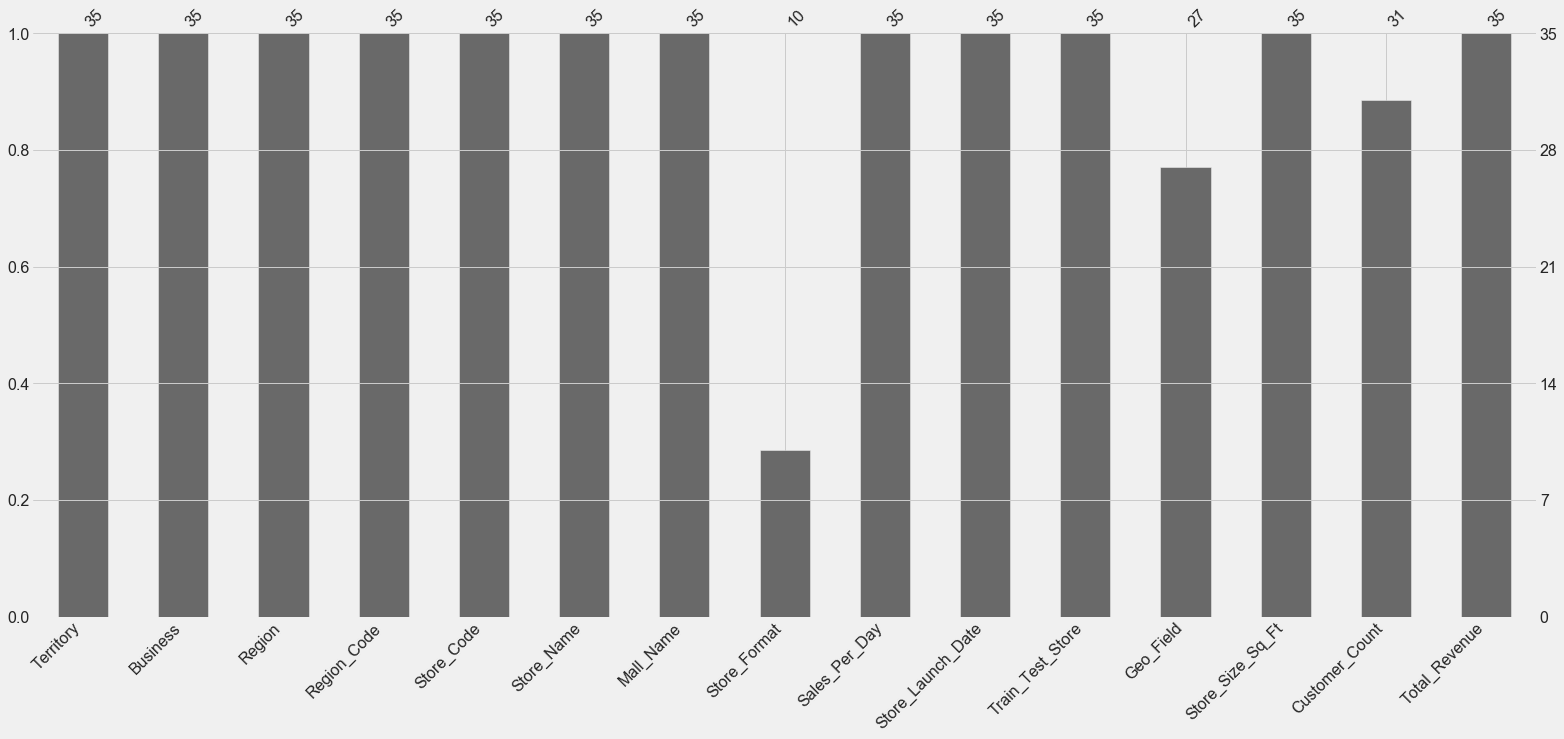

In [5]:
msno.bar(store_dem)

Text(0.5, 1.0, 'total footfall across regions')

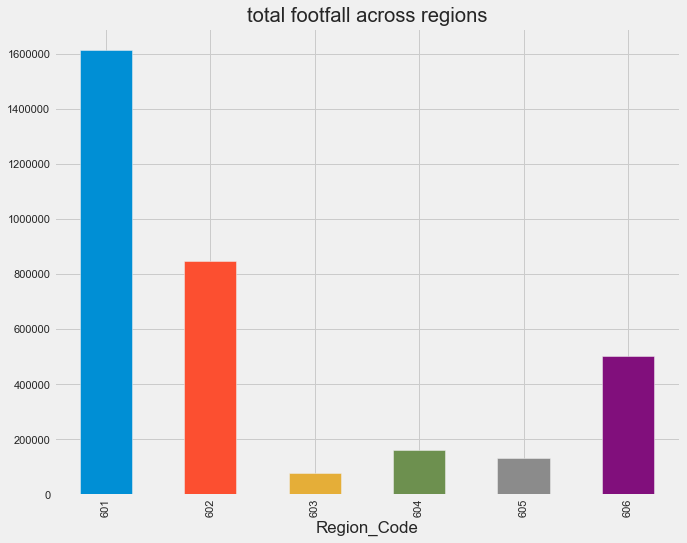

In [6]:
ax = store_dem.groupby('Region_Code')['Customer_Count'].sum().plot(kind='bar')
ax.set_title('total footfall across regions')

[Text(0.5, 1.0, 'Store sale vs Salesperday')]

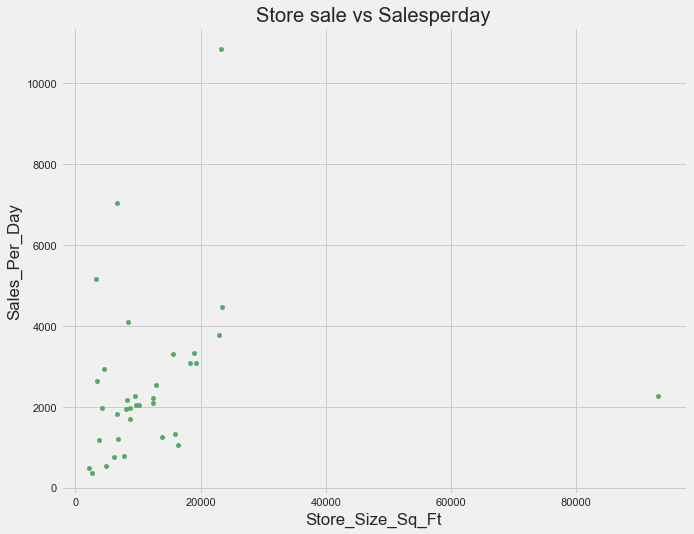

In [7]:
ax = store_dem.plot('Store_Size_Sq_Ft','Sales_Per_Day',kind='scatter',c='g')
ax.set(title = 'Store sale vs Salesperday')

**Average Sales across all regions are approximately equal**  

[Text(0.5, 1.0, ' Salesperday among regions')]

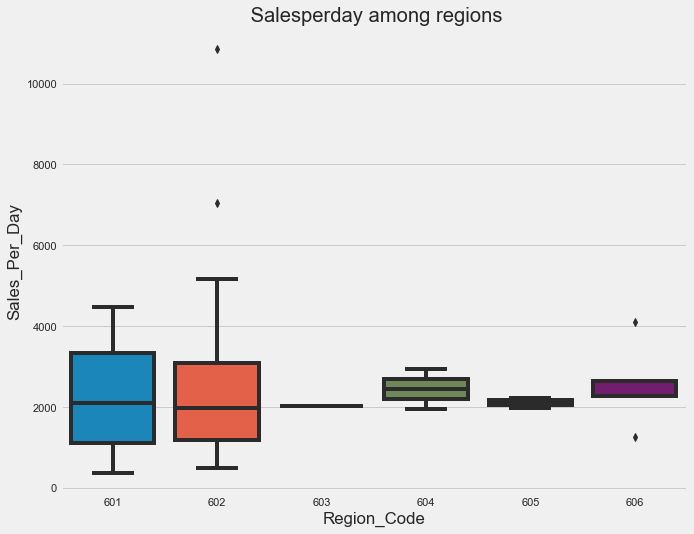

In [8]:
ax = sns.boxplot(x='Region_Code',y='Sales_Per_Day',data=store_dem)
ax.set(title =' Salesperday among regions')

In [9]:
def value(x, pos):
   
    if x >= 1000000:
        return '${: 1.0f}M'.format(x*1e-6)
    return '${: 1.0f}K'.format(x*1e-3)

**Region codes 601 & 602 are the top revenue generators, 603 at lowest of all**

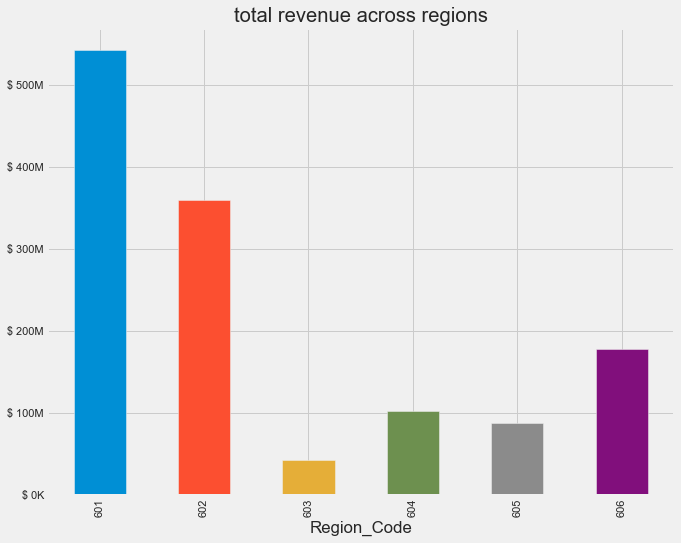

In [10]:
fig,ax= plt.subplots()
ax = store_dem.groupby('Region_Code')['Total_Revenue'].sum().plot(kind='bar')
ax.set(title='total revenue across regions')
form = FuncFormatter(value)
ax.yaxis.set_major_formatter(form)

In [11]:
cus_dem.head(3)

,Customer_ID,Territory,Nationality,Income_Range,Job_Type,Marital_Status,Gender,State,Language,Loyalty_Status,Birth_date,Age,Points,First_txn_dt,Last_accr_txn_dt,Last_rdm_txn_dt
0,1800000006365760,United Arab Emirates,INDIA,Below 5000,Services,Married,M,Abu Dhabi,English,Gold,01JUN1959:00:00:00,59.0,814.0,02NOV2010:00:00:00,27SEP2018:21:45:25,11MAR2018:19:11:57
1,1800000006365820,United Arab Emirates,UNITED ARAB EMIRATES,Below 5000,Services,Married,F,Abu Dhabi,Arabic,Silver,01JAN1900:00:00:00,NaN,212.0,06DEC2010:00:00:00,16AUG2016:21:08:28,16MAR2015:13:39:12
2,1800000006366060,United Arab Emirates,SRI LANKA,Below 5000,Services,Married,M,Abu Dhabi,English,Silver,07JUN1959:00:00:00,59.0,186.0,17FEB2011:00:00:00,31AUG2018:20:52:18,30JAN2017:19:19:19


Text(0.5, 1.0, 'Top 20 Nationalitites visiting stores')

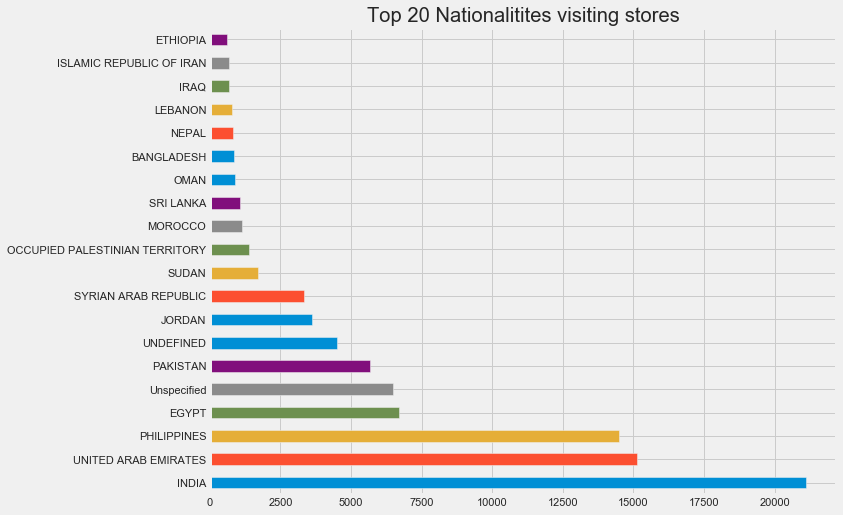

In [12]:
ax = cus_dem['Nationality'].value_counts()[:20].plot(kind='barh')
ax.set_title('Top 20 Nationalitites visiting stores')

Text(0.5, 1.0, 'Distribution Of Loyalty Status Card Holders')

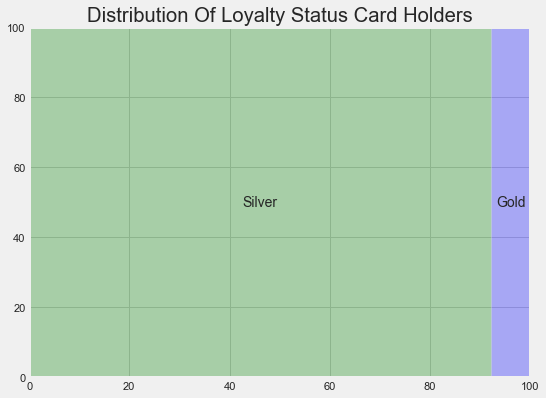

In [13]:
plt.figure(figsize=(8,6))
ax= squarify.plot(sizes=cus_dem['Loyalty_Status'].value_counts(),
              label=['Silver','Gold'],color=['green','blue'],alpha=0.3)
ax.set_title('Distribution Of Loyalty Status Card Holders')

Text(0.5, 1.0, 'Distribution Of Gender')

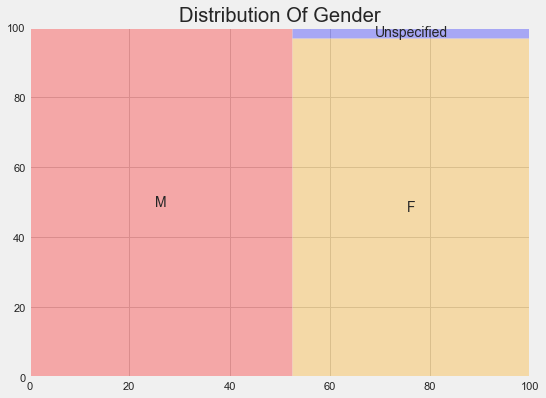

In [14]:
plt.figure(figsize=(8,6))
ax = squarify.plot(sizes=cus_dem['Gender'].value_counts(),
              label=cus_dem['Gender'].value_counts().index,color=['red','orange','blue'],alpha=0.3)
ax.set_title('Distribution Of Gender')

In [15]:
cus_trans.head(3)

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold
0,United Arab Emirates,Max,2010,0,60065,Dubai,Stand alone,Return,Size Problem,1800000058056860,1,3,-169.0,0.0,-3
1,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000020917140,1,1,0.0,0.0,0
2,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000021265010,1,1,0.0,0.0,0


In [16]:
cus_trans.shape

(544649, 15)

Text(0.5, 1.0, 'Distribution Of Transaction At Stores')

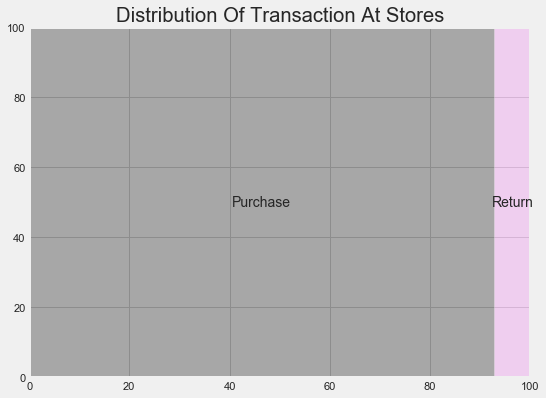

In [17]:
plt.figure(figsize=(8,6))
ax = squarify.plot(sizes=cus_trans['Transaction_Type'].value_counts(),
              label=cus_trans['Transaction_Type'].value_counts().index,color=['black','violet'],alpha=0.3)
ax.set_title('Distribution Of Transaction At Stores')

**Transactions in return is not used for further analysis**

In [18]:
return_df = cus_trans[cus_trans['Transaction_Type'] == 'Return'] 

In [19]:
return_df.head(3)

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold
0,United Arab Emirates,Max,2010,0,60065,Dubai,Stand alone,Return,Size Problem,1800000058056860,1,3,-169.0,0.0,-3
263,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Return,Size Problem,1800000006481140,1,1,-50.0,-28.0,-2
264,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Return,Size Problem,1800000006578370,1,5,-268.0,0.0,-5


**Cohort Analysis**  

 Here Visitor rentention and Revenue generation across stores along 52 weeks are analyzed  

**There are purchases without revenue but with invoices printed out, have to check with data gathering systems**

In [20]:
dff = cus_trans[cus_trans['Transaction_Type'] == 'Purchase']

In [21]:
dff.head(3)

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold
1,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000020917140,1,1,0.0,0.0,0
2,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000021265010,1,1,0.0,0.0,0
3,United Arab Emirates,Max,2016,0,60053,NaN,NaN,Purchase,NaN,1800000025693950,1,4,0.0,0.0,0


In [22]:
purchase_df = cus_trans[(cus_trans['Transaction_Type'] == 'Purchase') & (cus_trans['Revenue'] > 0)]

In [23]:
purchase_df.shape

(468668, 15)

In [24]:
purchase_df.head(3)

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold
27,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006395940,1,6,176.75,48.25,6
28,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006481140,1,4,69.00,85.00,4
29,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006496370,1,9,206.00,128.00,9


In [25]:
df = purchase_df.copy()

In [26]:
df['date_com'] = df['Year'].astype(str) +' ' + df['Week'].astype(str)                     

In [27]:
df['Cohort_Period'] = df['date_com'].apply(lambda x: datetime.strptime(x + ' 6' , "%G %V %w").date())

In [28]:
df['Customer_ID'] = df['Customer_ID'].astype(str)

In [29]:
df.head()

,Territory,Business,Year,Week,Store_Code,City_Name,Store_Type,Transaction_Type,Return_Reason,Customer_ID,Invoices,Item_Count,Revenue,Discount,Units_Sold,date_com,Cohort_Period
27,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006395940,1,6,176.75,48.25,6,2016 0,2016-01-02
28,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006481140,1,4,69.00,85.00,4,2016 0,2016-01-02
29,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006496370,1,9,206.00,128.00,9,2016 0,2016-01-02
30,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006578270,1,6,236.00,113.00,6,2016 0,2016-01-02
31,United Arab Emirates,Max,2016,0,60053,Abu Dhabi,Stand alone,Purchase,NaN,1800000006607200,1,3,101.00,37.00,5,2016 0,2016-01-02


In [30]:
df.set_index('Customer_ID',inplace=True)

df['Cohort_Group'] = df.groupby(level=0)['Cohort_Period'].first()

In [31]:
df.reset_index(inplace=True)

In [32]:
group = df.groupby(['Cohort_Group','Cohort_Period'])

In [33]:
cohorts = group.agg({'Customer_ID': pd.Series.nunique,
                     'Invoices': pd.Series.nunique,
                     'Revenue': np.sum})

In [34]:
cohorts.head(10)

Customer_ID  Invoices    Revenue
Cohort_Group Cohort_Period                                  
2016-01-02   2016-01-02            1885         6  288604.00
             2016-01-09             408         5   58735.75
             2016-01-16             314         6   45873.15
             2016-01-23             253         5   32420.26
             2016-01-30             296         6   49676.10
             2016-02-06             163         3   22114.30
             2016-02-13             156         4   21393.80
             2016-02-20             134         5   18428.75
             2016-02-27             123         3   16685.40
             2016-03-05             158         3   22395.01

In [35]:
def cohort(df):
    df['Cohort_period'] = np.arange(len(df)) + 1
    return df

In [36]:
cohorts = cohorts.groupby(level=0).apply(cohort)
cohorts.head()

Customer_ID  Invoices    Revenue  Cohort_period
Cohort_Group Cohort_Period                                                 
2016-01-02   2016-01-02            1885         6  288604.00              1
             2016-01-09             408         5   58735.75              2
             2016-01-16             314         6   45873.15              3
             2016-01-23             253         5   32420.26              4
             2016-01-30             296         6   49676.10              5

In [37]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['Cohort_Group', 'Cohort_period'], inplace=True)

In [38]:
cohort_size = cohorts['Customer_ID'].groupby(level=0).first()

In [39]:
visitor_ret= cohorts['Customer_ID'].unstack(0).divide(cohort_size, axis=1)
visitor_ret.head(10)

Cohort_Group,2016-01-02 00:00:00,2016-01-09 00:00:00,2016-01-16 00:00:00,2016-01-23 00:00:00,2016-01-30 00:00:00,2016-02-06 00:00:00,2016-02-13 00:00:00,2016-02-20 00:00:00,2016-02-27 00:00:00,2016-03-05 00:00:00,2016-03-12 00:00:00,2016-03-19 00:00:00,2016-03-26 00:00:00,2016-04-02 00:00:00,2016-04-09 00:00:00,2016-04-16 00:00:00,2016-04-23 00:00:00,2016-04-30 00:00:00,2016-05-07 00:00:00,2016-05-14 00:00:00,2016-05-21 00:00:00,2016-05-28 00:00:00,2016-06-04 00:00:00,2016-06-11 00:00:00,2016-06-18 00:00:00,2016-06-25 00:00:00,2016-07-02 00:00:00,2016-07-09 00:00:00,2016-07-16 00:00:00,2016-07-23 00:00:00,2016-07-30 00:00:00,2016-08-06 00:00:00,2016-08-13 00:00:00,2016-08-20 00:00:00,2016-08-27 00:00:00,2016-09-03 00:00:00,2016-09-10 00:00:00,2016-09-17 00:00:00,2016-09-24 00:00:00,2016-10-01 00:00:00,2016-10-08 00:00:00,2016-10-15 00:00:00,2016-10-22 00:00:00,2016-10-29 00:00:00,2016-11-05 00:00:00,2016-11-12 00:00:00,2016-11-19 00:00:00,2016-11-26 00:00:00,2016-12-03 00:00:00,2016-12-10 00:00:00,2016-12-17 00:00:00,2016-12-24 00:00:00,2016-12-31 00:00:00,2017-01-07 00:00:00,2017-01-14 00:00:00,2017-01-21 00:00:00,2017-01-28 00:00:00,2017-02-04 00:00:00,2017-02-11 00:00:00,2017-02-18 00:00:00,2017-02-25 00:00:00,2017-03-04 00:00:00,2017-03-11 00:00:00,2017-03-18 00:00:00,2017-03-25 00:00:00,2017-04-01 00:00:00,2017-04-08 00:00:00,2017-04-15 00:00:00,2017-04-22 00:00:00,2017-04-29 00:00:00,2017-05-06 00:00:00,2017-05-13 00:00:00,2017-05-20 00:00:00,2017-05-27 00:00:00,2017-06-03 00:00:00,2017-06-10 00:00:00,2017-06-17 00:00:00,2017-06-24 00:00:00,2017-07-01 00:00:00,2017-07-08 00:00:00,2017-07-15 00:00:00,2017-07-22 00:00:00,2017-07-29 00:00:00,2017-08-05 00:00:00,2017-08-12 00:00:00,2017-08-19 00:00:00,2017-08-26 00:00:00,2017-09-02 00:00:00,2017-09-09 00:00:00,2017-09-16 00:00:00,2017-09-23 00:00:00,2017-09-30 00:00:00,2017-10-07 00:00:00,2017-10-14 00:00:00,2017-10-21 00:00:00,2017-10-28 00:00:00,2017-11-04 00:00:00,2017-11-11 00:00:00,2017-11-18 00:00:00,2017-11-25 00:00:00,2017-12-02 00:00:00,2017-12-09 00:00:00,2017-12-16 00:00:00,2017-12-23 00:00:00,2017-12-30 00:00:00,2018-01-06 00:00:00
Cohort_period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0
2,0.216446,0.150000,0.128149,0.135373,0.100475,0.087101,0.073971,0.092689,0.079001,0.084330,0.089769,0.101124,0.095758,0.093936,0.072420,0.071640,0.131134,0.174743,0.104651,0.095442,0.093849,0.091528,0.071020,0.096990,0.099617,0.133610,0.095031,0.048512,0.052980,0.081633,0.107927,0.098947,0.081720,0.090802,0.091731,0.083333,0.072895,0.039164,0.065760,0.060498,0.044190,0.063291,0.062310,0.075501,0.068643,0.045375,0.060855,0.072981,0.061265,0.065508,0.064057,0.110465,0.078498,0.048364,0.053601,0.048421,0.048387,0.085878,0.043315,0.047904,0.077670,0.046225,0.066265,0.060559,0.080000,0.050633,0.054276,0.065891,0.070746,0.132492,0.102473,0.094576,0.051724,0.046980,0.084416,0.083845,0.077558,0.057512,0.078582,0.081395,0.098361,0.086059,0.072790,0.074913,0.048173,0.049296,0.063866,0.046077,0.0

Text(0.5, 0, '')

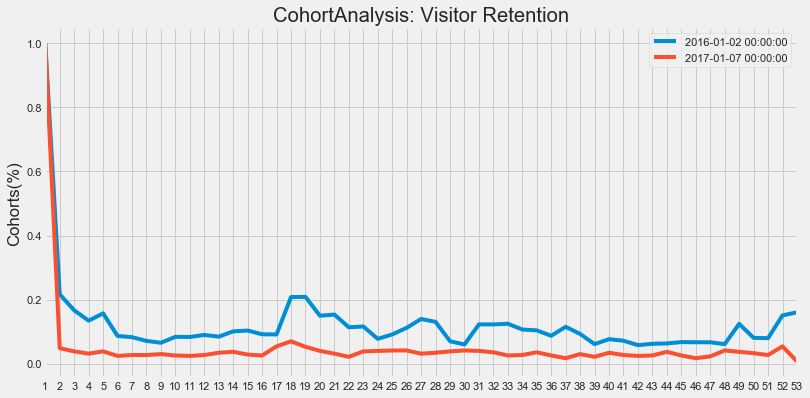

In [40]:
ax = visitor_ret['2016-01-02'].plot(figsize=(12,6),legend='2016')
ax = visitor_ret['2017-01-07'].plot(figsize=(12,6),legend='2017')
plt.title('CohortAnalysis: Visitor Retention')
plt.xticks(np.arange(1, 53.1, 1))
plt.xlim(1, 53)
plt.ylabel('Cohorts(%)')
plt.xlabel(None)

In [41]:
revenue_size = cohorts['Revenue'].groupby(level=0).first()

In [42]:
revn_store = cohorts['Revenue'].unstack(0).divide(revenue_size, axis=1)
revn_store.head(10)

Cohort_Group,2016-01-02 00:00:00,2016-01-09 00:00:00,2016-01-16 00:00:00,2016-01-23 00:00:00,2016-01-30 00:00:00,2016-02-06 00:00:00,2016-02-13 00:00:00,2016-02-20 00:00:00,2016-02-27 00:00:00,2016-03-05 00:00:00,2016-03-12 00:00:00,2016-03-19 00:00:00,2016-03-26 00:00:00,2016-04-02 00:00:00,2016-04-09 00:00:00,2016-04-16 00:00:00,2016-04-23 00:00:00,2016-04-30 00:00:00,2016-05-07 00:00:00,2016-05-14 00:00:00,2016-05-21 00:00:00,2016-05-28 00:00:00,2016-06-04 00:00:00,2016-06-11 00:00:00,2016-06-18 00:00:00,2016-06-25 00:00:00,2016-07-02 00:00:00,2016-07-09 00:00:00,2016-07-16 00:00:00,2016-07-23 00:00:00,2016-07-30 00:00:00,2016-08-06 00:00:00,2016-08-13 00:00:00,2016-08-20 00:00:00,2016-08-27 00:00:00,2016-09-03 00:00:00,2016-09-10 00:00:00,2016-09-17 00:00:00,2016-09-24 00:00:00,2016-10-01 00:00:00,2016-10-08 00:00:00,2016-10-15 00:00:00,2016-10-22 00:00:00,2016-10-29 00:00:00,2016-11-05 00:00:00,2016-11-12 00:00:00,2016-11-19 00:00:00,2016-11-26 00:00:00,2016-12-03 00:00:00,2016-12-10 00:00:00,2016-12-17 00:00:00,2016-12-24 00:00:00,2016-12-31 00:00:00,2017-01-07 00:00:00,2017-01-14 00:00:00,2017-01-21 00:00:00,2017-01-28 00:00:00,2017-02-04 00:00:00,2017-02-11 00:00:00,2017-02-18 00:00:00,2017-02-25 00:00:00,2017-03-04 00:00:00,2017-03-11 00:00:00,2017-03-18 00:00:00,2017-03-25 00:00:00,2017-04-01 00:00:00,2017-04-08 00:00:00,2017-04-15 00:00:00,2017-04-22 00:00:00,2017-04-29 00:00:00,2017-05-06 00:00:00,2017-05-13 00:00:00,2017-05-20 00:00:00,2017-05-27 00:00:00,2017-06-03 00:00:00,2017-06-10 00:00:00,2017-06-17 00:00:00,2017-06-24 00:00:00,2017-07-01 00:00:00,2017-07-08 00:00:00,2017-07-15 00:00:00,2017-07-22 00:00:00,2017-07-29 00:00:00,2017-08-05 00:00:00,2017-08-12 00:00:00,2017-08-19 00:00:00,2017-08-26 00:00:00,2017-09-02 00:00:00,2017-09-09 00:00:00,2017-09-16 00:00:00,2017-09-23 00:00:00,2017-09-30 00:00:00,2017-10-07 00:00:00,2017-10-14 00:00:00,2017-10-21 00:00:00,2017-10-28 00:00:00,2017-11-04 00:00:00,2017-11-11 00:00:00,2017-11-18 00:00:00,2017-11-25 00:00:00,2017-12-02 00:00:00,2017-12-09 00:00:00,2017-12-16 00:00:00,2017-12-23 00:00:00,2017-12-30 00:00:00,2018-01-06 00:00:00
Cohort_period,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.203517,0.125505,0.122706,0.122625,0.089283,0.088743,0.060812,0.091561,0.078739,0.063579,0.088984,0.102257,0.095110,0.085281,0.055822,0.072110,0.165727,0.141588,0.084476,0.091411,0.097442,0.074250,0.063627,0.072264,0.090254,0.119423,0.076460,0.040138,0.049083,0.078143,0.082549,0.089401,0.096836,0.098549,0.083513,0.075625,0.050492,0.040750,0.058343,0.060503,0.037183,0.071507,0.070289,0.065053,0.065426,0.026152,0.054627,0.060126,0.069498,0.063421,0.056551,0.103773,0.068765,0.056667,0.090204,0.042185,0.044116,0.083542,0.048826,0.038069,0.081866,0.048362,0.081226,0.048705,0.073507,0.043874,0.049432,0.102246,0.049703,0.107370,0.098926,0.089607,0.038865,0.042817,0.095959,0.074441,0.089145,0.039436,0.080205,0.092284,0.087135,0.080899,0.100496,0.065469,0.036614,0.040101,0.075083,0.067484,0.

Text(0.5, 0, '')

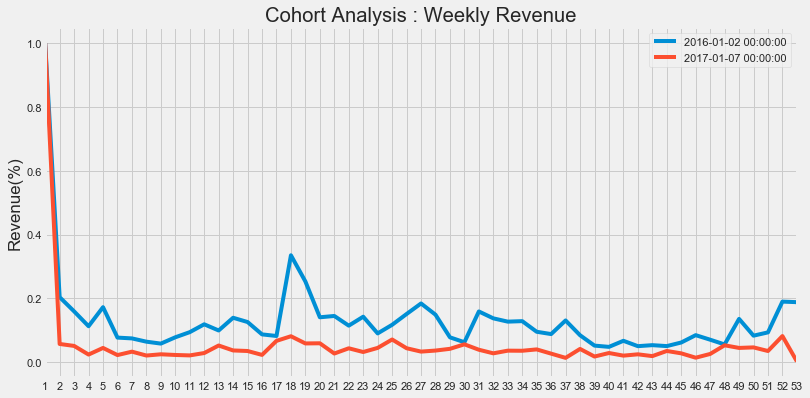

In [43]:
ax = revn_store['2016-01-02'].plot(figsize=(12,6),legend='2016')
ax = revn_store['2017-01-07'].plot(figsize=(12,6),legend='2017')
plt.title('Cohort Analysis : Weekly Revenue')
plt.xticks(np.arange(1, 53.1, 1))
plt.xlim(1, 53)
plt.ylabel('Revenue(%)')
plt.xlabel(None)

**Key Findings**  

 1). Average sales across all reion codes are approximately equall.  
 2). Cummulative visitor and revenue across cohort period is comparitively lower in 2017 than in 2016 period.  
 